## Image Classification

### Introduction


Convolutional Neural Networks are a network of neurons that make it possible to encode properties into the neural network architecture, reducing number of parameters. 

In this tutorial, we explore three different easy ways of using CNN's for image classification.

Part 1 - Using pre-trained models

Part 2 - Training your own model

Part 3 - Tuning an existing network


Run the following commands as a pre-requisite 
> git clone https://github.com/fchollet/deep-learning-models

This gives you pre-trained weights of VGG16, VGG19, and the ResNet50 architectures and other models that we will use in this tutorial. cd into the cloned directory. The resnet50.py , vgg16.py , and vgg19.py  files correspond to their respective network architecture definitions.

> pip install opencv-python

OpenCV has a wide range of image manipulation capabilities

Some of the functions used here work only with Keras 2.0.0 version.

### Part 1 -  Using Pre-Trained Models

We will use the VGG16 pre-trained model.This is the Keras model of the 16-layer network used by the VGG team in the ILSVRC-2014 competition.
Training new models requires very large datasets and is quite time consuming. When exisitng models perform very well, we often just re-use their weights.

In [4]:
import numpy as np
import keras
from keras.preprocessing import image as image_utils

import sys
import os
from vgg16 import VGG16

import warnings
warnings.simplefilter('ignore')

In [5]:
from keras.preprocessing import image
from imagenet_utils import preprocess_input, decode_predictions


# load the input image using the Keras helper utility while ensuring that the image is resized to 224x224 pxiels, the required
# input dimensions for the network.
img_path = 'images/monitor.jpeg'
image = image_utils.load_img(img_path, target_size=(224, 224))
image = image_utils.img_to_array(image)

# The image is represented by a NumPy array of shape (3, 224, 224), Below the dimensions is made to be (1, 3, 224, 224) so we can
# pass it through the network 
# Preprocess the image by subtracting the mean RGB pixel intensity from the ImageNet
image = np.expand_dims(image, axis=0)
image = preprocess_input(image)

In [6]:
#Load the model
model = VGG16(weights="imagenet")

#Test on above created image
preds = model.predict(image)

#See the predictions
decode_predictions(preds)

[[('n03782006', 'monitor', 0.49119553),
  ('n03180011', 'desktop_computer', 0.2197699),
  ('n04152593', 'screen', 0.13147223),
  ('n04404412', 'television', 0.12822683),
  ('n03832673', 'notebook', 0.00856371)]]

## Part 2- Train your own model

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. 
We will train and test on this model.
<br>
This is a large dataset. It is unlikely that in a real world problem, you would encounter so much of training data for a new task.

In [7]:
from keras.datasets import cifar10
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D,Activation,GlobalAveragePooling2D
from keras.models import Sequential
from keras.utils import to_categorical
import keras
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [8]:
#Code to load the training date

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_img = x_train.shape[1]
y_img = x_train.shape[2]
input_shape = (x_img, y_img, 1)
print('Train shape:' + str(x_train.shape))
print('Train shape:' + str(x_test.shape))

Train shape:(50000, 32, 32, 3)
Train shape:(10000, 32, 32, 3)


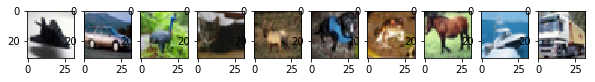

In [9]:
#Seeing random pictures of the ten classes

labels = np.unique(y_train)
f, axarr = plt.subplots(1, 10 , figsize=(10, 10))
for l in range(0,10):
    idx = np.argwhere(y_train==l)[0][0]
    img = x_train[idx]
    axarr[l].imshow(img)
plt.show()

In [10]:
num_classes = len(labels)

# convert the data to the right type
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255


# convert class vectors to binary class matrices - 
# this is for use in the categorical_crossentropy loss
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# The above lines of code converts y into a one hot encoded format, if the classes were 1,2,4 and there were 5 classes, the one
# hot encoding looks like: [1,0,0,0,0],[0,1,0,0,0],[0,0,0,0,1]

In [11]:
#The Sequential model is a linear stack of layers.
model = Sequential()

# creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs. 
# The convolution layer is the main building block of a convolutional neural network.
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))

#Activation applied to output.ReLu: The rectifier function is an activation function f(x) = Max(0, x) which can be used by 
#neurons just like any other activation function, a node using the rectifier activation function is called a ReLu node.
model.add(Activation('relu'))


model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))

#Max pooling is a sample-based discretization process. The objective is to down-sample an input representation
#(image, hidden-layer output matrix, etc.), reducing its dimensionality and allowing for assumptions to be made about features 
#contained in the sub-regions binned.
model.add(MaxPooling2D(pool_size=(2, 2)))

#Flattens the input. Does not affect the batch size.
model.add(Flatten())

#Dense implements the operation: output = activation(dot(input, kernel) + bias) where activation is the 
#element-wise activation function passed as the activation argument, kernel is a weights matrix created by the layer,
# and bias is a bias vector created by the layer (only applicable if use_bias is True).
model.add(Dense(512))
model.add(Activation('relu'))

model.add(Dense(num_classes))

#The softmax function is often used in the final layer of a neural network-based classifier. Such networks are
#commonly trained under a log loss (or cross-entropy).
model.add(Activation('softmax'))

In [13]:
warnings.simplefilter('ignore')

'''
Configure the learning
An optimizer: This could be the string identifier of an existing optimizer (such as rmsprop or adagrad), or an instance of the 
Optimizer class.
A loss function: This is the objective that the model will try to minimize. It can be the string identifier of an existing 
loss function (such as categorical_crossentropy or mse), or it can be an objective function. 
A list of metrics: For any classification problem you will want to set this to metrics=['accuracy']. A metric could be the 
string identifier of an existing metric or a custom metric function.

'''
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

batch_size = 100
epochs = 10

#fit the model. validation data is optional
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,validation_split=0.1)

Train on 45000 samples, validate on 5000 samples
Epoch 1/10
45000/45000 [==============================] - 68s - loss: 0.0958 - acc: 0.9684 - val_loss: 1.3283 - val_acc: 0.7338
Epoch 2/10
45000/45000 [==============================] - 65s - loss: 0.0726 - acc: 0.9756 - val_loss: 1.3285 - val_acc: 0.7412
Epoch 3/10
45000/45000 [==============================] - 74s - loss: 0.0713 - acc: 0.9766 - val_loss: 1.4280 - val_acc: 0.7376
Epoch 4/10
45000/45000 [==============================] - 69s - loss: 0.0551 - acc: 0.9816 - val_loss: 1.5007 - val_acc: 0.7452
Epoch 5/10
45000/45000 [==============================] - 73s - loss: 0.0579 - acc: 0.9810 - val_loss: 1.5643 - val_acc: 0.7402
Epoch 6/10
45000/45000 [==============================] - 65s - loss: 0.0551 - acc: 0.9812 - val_loss: 1.5781 - val_acc: 0.7358
Epoch 7/10
45000/45000 [==============================] - 68s - loss: 0.0461 - acc: 0.9847 - val_loss: 1.7218 - val_acc: 0.7302
Epoch 8/10
45000/45000 [==============================]

In [14]:
eval = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', eval[0])
print('Test accuracy:', eval[1])

Test loss: 1.8473302176952362
Test accuracy: 0.7286


### Tuning an existing Network 

Fine tuning is a process to take a network model that has already been trained for a given task, and make it perform a second similar task.
In the classic supervised learning scenario of machine learning, if we intend to train a model for some task and domain, we assume that we are provided with labeled data for the same task and domain. The traditional supervised learning paradigm breaks down when we do not have sufficient labeled data for the task or domain we care about to train a reliable model. 

If we want to train a model to detect pedestrians on night-time images, we could apply a model that has been trained on a similar domain, e.g. on day-time images. In practice, however, we often experience a deterioration or collapse in performance as the model has inherited the bias of its training data and does not know how to generalize to the new domain. Therefore, we reuse some of the information from the first few layers and train only the specifc layers.


In [12]:
#Just modifying input format for CIFAR 10
import cv2
import random

def resize_data(data):
    data_upscaled = np.zeros((data.shape[0], 48, 48, 3))
    for i, img in enumerate(data):
        large_img = cv2.resize(img, dsize=(48, 48), interpolation=cv2.INTER_CUBIC)
        data_upscaled[i] = large_img

    return data_upscaled

# read data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# limit the amount of the data
# train data
ind_train = random.sample(list(range(x_train.shape[0])), 2000)
x_train = x_train[ind_train]
y_train = y_train[ind_train]

# test data
ind_test = random.sample(list(range(x_test.shape[0])), 2000)
x_test = x_test[ind_test]
y_test = y_test[ind_test]

# resize train and  test data
x_train_resized = resize_data(x_train)
x_test_resized = resize_data(x_test)

# make explained variable hot-encoded
y_train_hot_encoded = to_categorical(y_train)
y_test_hot_encoded = to_categorical(y_test)

In [13]:
from keras.layers import Dropout
from keras.models import Model
from keras.optimizers import SGD

#Loads existing model
vgg_model = VGG16(weights='imagenet', include_top=False)

x = vgg_model.output
x = GlobalAveragePooling2D()(x)

# add fully-connected layer
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)

# add output layer
predictions = Dense(10, activation='softmax')(x)

model = Model(inputs=vgg_model.input, outputs=predictions)

# freeze pre-trained model area's layer
for layer in vgg_model.layers:
    layer.trainable = False

# update the weight that are added
model.compile(optimizer='rmsprop', loss='categorical_crossentropy')
model.fit(x_train_resized, y_train_hot_encoded)

# choose the layers which are updated by training
layer_num = len(model.layers)
for layer in model.layers[:18]:
    layer.trainable = False

for layer in model.layers[18:]:
    layer.trainable = True

# training
#Stochastic Gradient Descent(SGD) on the other hand performs a parameter update for each training example.
#It is usually much faster technique.It performs one update at a time.

model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train_resized, y_train_hot_encoded, batch_size=256, epochs=15, shuffle=True,  validation_split=0.1)

Epoch 1/1
2000/2000 [==============================] - 36s - loss: 9.4361    
Train on 1800 samples, validate on 200 samples
Epoch 1/15
1800/1800 [==============================] - 33s - loss: 7.1797 - acc: 0.4572 - val_loss: 7.0531 - val_acc: 0.4500
Epoch 2/15
1800/1800 [==============================] - 32s - loss: 7.0233 - acc: 0.4700 - val_loss: 6.9123 - val_acc: 0.4650
Epoch 3/15
1800/1800 [==============================] - 31s - loss: 6.9247 - acc: 0.4656 - val_loss: 6.7753 - val_acc: 0.4700
Epoch 4/15
1800/1800 [==============================] - 33s - loss: 6.9124 - acc: 0.4694 - val_loss: 6.7235 - val_acc: 0.4650
Epoch 5/15
1800/1800 [==============================] - 34s - loss: 6.8735 - acc: 0.4700 - val_loss: 6.7094 - val_acc: 0.4650
Epoch 6/15
1800/1800 [==============================] - 32s - loss: 6.7861 - acc: 0.4733 - val_loss: 6.7716 - val_acc: 0.4600
Epoch 7/15
1800/1800 [==============================] - 32s - loss: 6.5840 - acc: 0.4828 - val_loss: 6.7571 - val_acc: 

In [14]:
eval = model.evaluate(x_test_resized, y_test_hot_encoded, verbose=0)
print('Test loss:', eval[0])
print('Test accuracy:', eval[1])

Test loss: 7.167796760559082
Test accuracy: 0.438


### Conclusion

Image Classification is a growing area. This tutorial covers three basic techniques and serves as a starting point to explore the different techniques that exist.